In [2]:
from generative_example import get_real_data_preprocessed
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli

In [3]:
X, y = get_real_data_preprocessed()
print(X.shape)
print(y.shape)
print(X[0])
print(y[0])
print(len(X[0]))

(50000,)
(50000,)
b'costner drag movi far longer necessari asid terrif sea rescu sequenc care charact ghost closet costner charact realiz earli forgotten much later time care charact realli care cocki overconfid ashton kutcher problem come kid think hes better anyon els around show sign clutter closet obstacl appear win costner final well past half way point stinker costner tell kutcher ghost told kutcher driven best prior inkl foreshadow magic could keep turn hour'
0
449


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [5]:
vectorizer = CountVectorizer()
vectorizer.fit(X)
X_v = vectorizer.transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_v, y, test_size=0.5, random_state=0, stratify=y
)


In [6]:
# print(vectorizer.get_feature_names(),0)

In [7]:
# print(X_v.toarray().shape)
# 50000 sentence, 69122 unique words

In [8]:
# np.set_printoptions(threshold=sys.maxsize)


In [9]:
# print(X.toarray()[0])

In [10]:
model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB()

In [11]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.89376
0.84548


In [12]:
model_1 = MultinomialNB()
model_1.fit(X_train, y_train)

MultinomialNB()

In [13]:
print(model_1.score(X_train, y_train))
print(model_1.score(X_test, y_test))

0.89636
0.84832


In [14]:
model.feature_log_prob_

array([[-7.64188444, -9.43364391, -9.43364391, ..., -8.74049673,
        -9.43364391, -9.43364391],
       [-8.74049673, -9.43364391, -8.74049673, ..., -9.43364391,
        -9.43364391, -9.43364391]])

In [15]:
model.feature_log_prob_.shape

(2, 69122)

In [16]:
prob = np.exp(model.feature_log_prob_)

In [17]:
# prob

In [18]:
model.class_count_

array([12500., 12500.])

In [19]:
np.exp(model.class_log_prior_)

array([0.5, 0.5])

In [20]:
first_feature = bernoulli.rvs(np.exp(model.feature_log_prob_[0, 0]), size=1000)

In [21]:
from sklearn.datasets import make_classification

In [22]:
Xg, yg = make_classification(1000, n_features=69122)

In [23]:
print(model.score(Xg, yg))


0.5


In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
sns.set()

In [25]:
predicted_labels = model.predict(X_train)

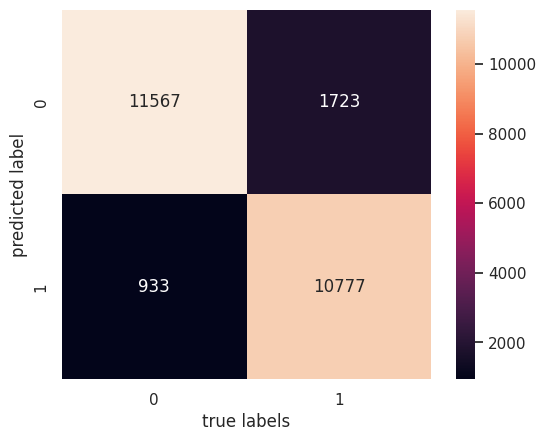

The accuracy is 0.894
The F1 score is 0.890


In [26]:
# plot the confusion matrix
mat = confusion_matrix(y_train, predicted_labels)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print(f"The accuracy is {accuracy_score(y_train, predicted_labels):.3f}")
print(f"The F1 score is {f1_score(y_train, predicted_labels):.3f}")

In [27]:
# show all the tokens in the positive class
pos_class_prob_sorted = model.feature_log_prob_[1, :].argsort()
print(np.take(vectorizer.get_feature_names(), pos_class_prob_sorted[-20:]))

['much' 'even' 'realli' 'would' 'also' 'love' 'well' 'charact' 'get'
 'stori' 'watch' 'great' 'make' 'good' 'see' 'time' 'like' 'one' 'movi'
 'film']


/home/codespace/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
# show all the tokens in the negative class
neg_class_prob_sorted = model.feature_log_prob_[0, :].argsort()
print(np.take(vectorizer.get_feature_names(), neg_class_prob_sorted[-20:]))

['scene' 'much' 'dont' 'look' 'act' 'realli' 'charact' 'see' 'would' 'bad'
 'good' 'get' 'time' 'even' 'watch' 'make' 'like' 'one' 'film' 'movi']


In [29]:
print(np.take(vectorizer.get_feature_names(), 1000))

ahuntin


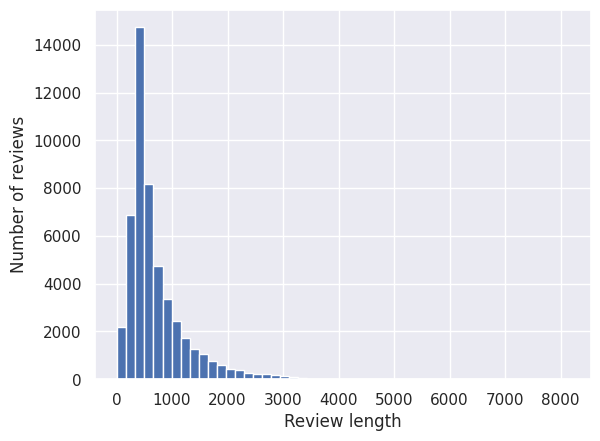

In [30]:
# plot review length
plt.hist([len(x) for x in X], bins=50)
plt.xlabel("Review length")
plt.ylabel("Number of reviews")
plt.show()

In [31]:
# fit a possion distribution to the review length
from scipy.stats import poisson
mu = np.mean([len(x) for x in X])
print(mu)
r = poisson.rvs(mu, size=3000)
# print(r)

707.35278


In [32]:
r.shape

(3000,)

In [35]:
r.shape[0]

3000

In [83]:
# generate 3000 positive review with words randomly drawn from the positive class with probability
# given by the model
pos_class_prob_sorted = model.feature_log_prob_[1, :].argsort()
pos_class_prob = np.exp(model.feature_log_prob_[1, :])
pos_class_prob = pos_class_prob / pos_class_prob.sum()
pos_class_prob = pos_class_prob[pos_class_prob_sorted]
# print(pos_class_prob)
Xg=[]
s=[]
for i in range(r.shape[0]):
# for i in range(2):
    g=(np.take(vectorizer.get_feature_names(),np.random.choice(pos_class_prob_sorted,r[i], p=pos_class_prob)))
    # stich the words together to form a sentence
    # switch g to list
    g=list(g)
    # print(g)
    # print(type(g))
    s=" ".join(g)
    Xg.append(s)
    # print(s)
    # Xg.append(g)
# Xg
# print(Xg[:10])
# print(pos_class_words)
# make 3000 sentences with 30 words each
# pos_class_words = np.random.choice(pos_class_prob_sorted, 3000*r, p=pos_class_prob)
# pos_class_words = pos_class_words.reshape(3000, r)
# print(pos_class_words)


/home/codespace/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [84]:
Xg

['transliter alway question perfect better ador left downfal necessarili temper clinton point act certain pleas suggest disturb hang apart first seri mani say danc han moment happi would open way zhiwen gambl around time isnt oliv california contrast balanc flair decompress element ship play john excel asoci day mirror pretti pakistani smile enhanc next sorpasso arthur soul stop fair eye hollaway nielsen horror done peopl tri mani seem countri told charlott identifi elud may blood guid shadowi entertain seen much felt clinic took time love light stoke symbiot tri violenc bet decent spice chris seen richard woman narcist evolv part think thought ami night maxwel real liter good appreci past chang give caution obadiah zukov whole deep influenc play happi issu buddi degrad wga music root rest butcher seargeant daughter clint occas presum worship embarrass far fact magnific movi frazer need sam later compani unscript play occasion child differ captiv old young mysteri languag took good fig

In [34]:
yg = np.ones(3000)
# yg

In [55]:
xx = np.empty(3000)

In [56]:
xx

array([6.90721593e-310, 6.90721593e-310, 1.21775854e-315, ...,
       6.11130817e+223, 2.59033217e-144, 2.59903832e-144])

In [57]:
np.concatenate(xx,xx)

TypeError: only integer scalar arrays can be converted to a scalar index

In [49]:
X_v.shape

(50000, 69122)

In [50]:
X.shape

(50000,)